In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [ ]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)

X=iris.data
y=iris.target
df["species"]=y
df["species"]=df["species"].map({0:"setosa",1:"versicular",2:"verginica"})
print("original dataset shape:",df.shape)
print(df.head())
print(df["species"].dtypes)


original dataset shape: (150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
object


In [ ]:
np.random.seed(42)
for col in df.columns[:-1]:
  df.loc[df.sample(frac=0.05).index, col] = np.nan
print("total null values:",df.isnull().sum())

total null values: sepal length (cm)    8
sepal width (cm)     8
petal length (cm)    8
petal width (cm)     8
species              0
dtype: int64


In [ ]:
for col in df.columns[:-1]:
  df[col].fillna(df[col].mean(),inplace=True)


df["species"]=df["species"].fillna(df["species"].mode()[0])
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


/tmp/ipython-input-529884751.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [ ]:
X=df.drop("species",axis=1)
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [ ]:
param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred_model=model.predict(X_test)

In [ ]:
forest=RandomForestClassifier(n_estimators=200,random_state=42,max_depth=20,min_samples_leaf= 2,min_samples_split= 5)
forest.fit(X_train,y_train)
y_pred_forest=forest.predict(X_test)

In [ ]:
grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
y_train_forest=forest.predict(X_train)
print("random forest train accuracy",accuracy_score(y_train,y_train_forest))
print("random forest accuracy:",accuracy_score(y_test,y_pred_forest))
print("confusion metrics for test data",confusion_matrix(y_test,y_pred_forest))
print("confusion metrics for train data",confusion_matrix(y_train,y_train_forest))

random forest train accuracy 0.975
random forest accuracy: 1.0
confusion metrics for test data [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
confusion metrics for train data [[40  0  0]
 [ 0 39  2]
 [ 0  1 38]]


In [ ]:
y_train_pred_model = model.predict(X_train)
print("logistic regression train accuracy", accuracy_score(y_train, y_train_pred_model))
print("logistic regression accuracy:",accuracy_score(y_test,y_pred_model))
print("confusion metrics for test data",confusion_matrix(y_test,y_pred_model))
print("confusion metrics for train data",confusion_matrix(y_train,y_train_pred_model))


logistic regression train accuracy 0.9333333333333333
logistic regression accuracy: 0.9666666666666667
confusion metrics for test data [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
confusion metrics for train data [[40  0  0]
 [ 0 37  4]
 [ 0  4 35]]


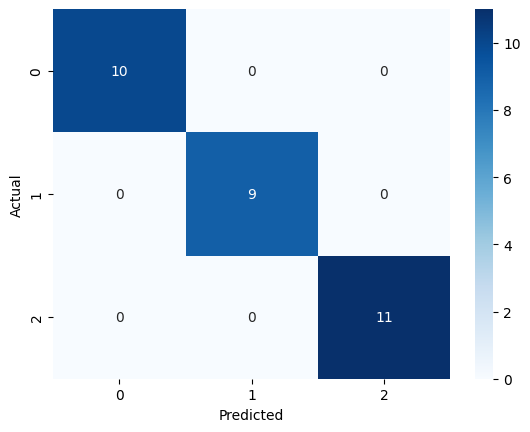

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

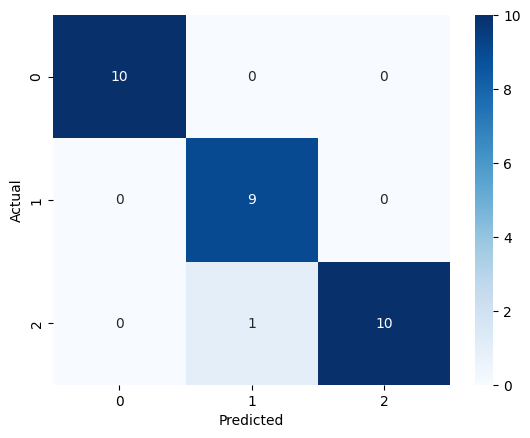

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_model), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()